# Question : Find the most words used in the Novel

# Step 1 : Get the Data 
we need to import requests module,
you can request it by creating a object 'r' and requesting the url of the novel/book by using get.

In [2]:
import requests
r = requests.get('https://www.gutenberg.org/files/74/74-h/74-h.htm')
print(type(r))

<class 'requests.models.Response'>


As you can see, it's a response object. we use text to extract the html from it. 
Let's print only few lines.

In [15]:
html = r.text
print(html[:1000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of The Adventures of Tom Sawyer, By Mark Twain</title>
<link rel="coverpage" href="images/cover.jpg" />
<style type="text/css" xml:space="preserve">

    body { margin-left: 20%; margin-right: 20%; background:#faebd0; text-align:justify}
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    div.fig    { display:block; margin:0 auto; text-align:center; }

</style>
  </head>
  <body>

<div styl


The above text doesn't make sense as it contains text and html code. Getting rid of some html tags will help us . 

# Step 2 : Wrangle the Data

From the bs4 module we can import BeautifulSoup.
Here, BeautifulSoup will extract text with ease from the html code.
create an object called soup


In [17]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)

Will use get_text on the soup object we created, earlier. At the end, print only few lines in between the novel, by passing an index on text.


In [23]:
text = soup.get_text()
print(text[10025:15000])


    

      “I never did see the beat of that boy!”
    

      She went to the open door and stood in it and looked out among the tomato
      vines and “jimpson” weeds that constituted the garden. No Tom.
      So she lifted up her voice at an angle calculated for distance and
      shouted:
    

      “Y-o-u-u TOM!”
    

      There was a slight noise behind her and she turned just in time to seize a
      small boy by the slack of his roundabout and arrest his flight.
    

      “There! I might ’a’ thought of that closet. What you
      been doing in there?”
    

      “Nothing.”
    

      “Nothing! Look at your hands. And look at your mouth. What is
      that truck?”
    

      “I don’t know, aunt.”
    

      “Well, I know. It’s jam—that’s what it is. Forty
      times I’ve said if you didn’t let that jam alone I’d
      skin you. Hand me that switch.”
    

      The switch hovered in the air—the peril was desperate—
    

      “My! Look behind you, aunt!”
    

     

The text is now more clear to read and understand.

# Step 3 : Using NLP extract words from text

we need to import nltk, the Natural Language toolkit. 
There are two parts for this step.

1. Tokenize the text
2. Remove stopwords.


# 1
To tokenize the text , which means we need to split the words in the text. 
by passing '\w', it will separate words with whitespaces.
we need to import Regexptokenizer from nltk toolkit


In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)
print(tokens[:100])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Adventures', 'of', 'Tom', 'Sawyer', 'By', 'Mark', 'Twain', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'background', 'faebd0', 'text', 'align', 'justify', 'p', 'text', 'indent', '1em', 'margin', 'top', '25em', 'margin', 'bottom', '25em', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'text', 'align', 'center', 'margin', 'left', '15', 'margin', 'right', '15', 'hr', 'width', '50', 'text', 'align', 'center', 'blockquote', 'font', 'size', '97', 'font', 'style', 'italic', 'margin', 'left', '10', 'margin', 'right', '10', 'div', 'fig', 'display', 'block', 'margin', '0', 'auto', 'text', 'align', 'center', 'The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Adventures', 'of', 'Tom', 'Sawyer', 'by', 'Mark', 'Twain', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


We have words with uppercase letters, let's create a for loop which converts uppercase to lowercase and stores that in a list, as it becomes easy later on to calculate the number of words repeated.

In [28]:
words = []
for word in tokens:
    words.append(word.lower())

print(words[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'the', 'adventures', 'of', 'tom', 'sawyer']


# 2
The text has many articles  like 'the','an','and'. It's a common practice to get rid of these words. In order to get rid of these words we use stopwords package which already consists of such common words.


If any error , Use nltk.download('stopwords') to install the stopwords on your system.


In [30]:
import nltk

sw = nltk.corpus.stopwords.words('english')
print(sw[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


We got two lists now , we want the list of  all words in 'words' that are not in 'sw'. We need to use for loop here.

In [32]:
words_sw = []
for word in words:
    if word not in sw :
        words_sw.append(word)
        
print(words_sw[:20])

['project', 'gutenberg', 'ebook', 'adventures', 'tom', 'sawyer', 'mark', 'twain', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'background', 'faebd0', 'text', 'align', 'justify']


# Step 4 : Count the words 


In [33]:
from collections import Counter

count = Counter(words_sw)

top_ten = count.most_common(10)
print(top_ten)

[('tom', 824), ('said', 356), ('huck', 258), ('would', 241), ('one', 192), ('time', 191), ('could', 182), ('got', 177), ('well', 175), ('joe', 170)]


We can see that the word tom was used 824 times in the novel.

# Step 5 : Plot the data

We can use matplotlib here to plot the data.
You create a frequency distribution by using nltk.FreqDist and then plot the first 10 words by passing 10 as a argument to plot().

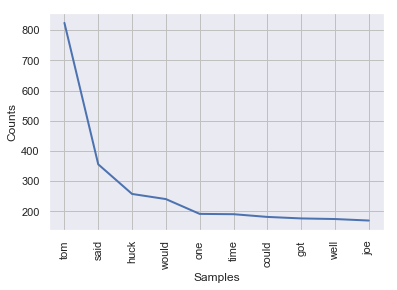

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
sns.set()
frq1 = nltk.FreqDist(words_sw)
frq1.plot(10)

It is easier to visualize the data through graphs.

# Creating a function


In [14]:
def word_frequency(url):
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_sw = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_sw.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_sw)
    freqdist1.plot(10)

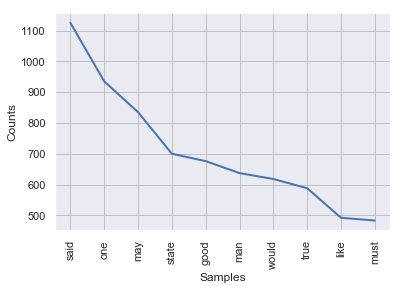

In [16]:
word_frequency('https://www.gutenberg.org/files/1497/1497-h/1497-h.htm')

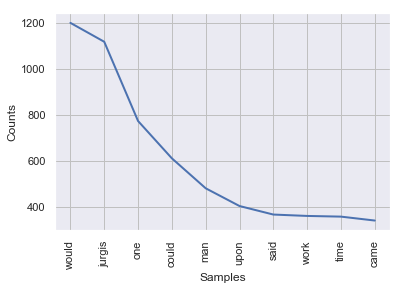

In [17]:
word_frequency('https://www.gutenberg.org/files/140/140-h/140-h.htm')

Here, we created our very own function which displays a graph of the total words repeated.

We just need to get the url of the novel and pass it as a argument in the function created. 